In this notebook I will present the same experiment as in the 'numpy_runtime' example, but with memory usage and a diferent column from the same database

Used libraries

1. numpy
2. pandas
3. tracemalloc
4. matplotlib

The database is from Kaggle ...

Import the necesary libraries

In [41]:
import numpy as np
import pandas as pd
import tracemalloc
import matplotlib.pyplot as plt

Fetch data from a database and store it inside a DataFrame

In [42]:
solar_yield = pd.read_csv('database/Solar_Generation_Data.csv')

Get the column 'DAILY_YIELD' from 'solar_yield' DataFrame and store it inside a numpy array

In [43]:
daily_yield_array = solar_yield['AC_POWER']
daily_yield_np_array = np.array(solar_yield['AC_POWER'])

Square using 2 diferent methods the values from 'DAILY_YIELD' column and calculate the necesary memory for this operation

Start the memory calculation with the start() function from 'tracemalloc' library

In [44]:
tracemalloc.start()

Square values from 'daily_yield_array' using clasic python method

In [45]:
# sqare the values from daily_yield_array
# square = 2 ** daily_yield_array[0:500]
for i in range(100):
    clasic_sum = sum(daily_yield_np_array[0:100])
    sqare = 2 ** clasic_sum

Calculate the used memory

In [46]:
# calculate the necesary memory
classic_sqare_size, clasic_sqare_peak = tracemalloc.get_traced_memory()

# reset the memory calculation
tracemalloc.clear_traces()

# print the used memory
print('\nSize: ', classic_sqare_size, 'bytes')
print('Peak: ', clasic_sqare_peak, 'bytes\n')


Size:  37623 bytes
Peak:  70248 bytes



Square values from 'daily_yield_array' using numpy.power() function

In [47]:
# np.power(2, daily_yield_array[0:500], out=square)
for i in range(100):
    np_sum = np.sum(daily_yield_np_array[0:100])
    sqare = np.power(2, np_sum)

Calculate the allocated memory

In [48]:
np_sqare_size, np_sqare_peak = tracemalloc.get_traced_memory()

# print the memory consumption
print('\nSize: ', np_sqare_size, 'bytes')
print('Peak: ', np_sqare_peak, 'bytes\n')


Size:  36087 bytes
Peak:  67293 bytes



Stop the memory consumption calculation using the tracemalloc.stop() function

In [49]:
tracemalloc.stop()

Show the results in a 'matplotlib' graph

Setting the graph

Text(0.5, 0, 'Memory in bytes')

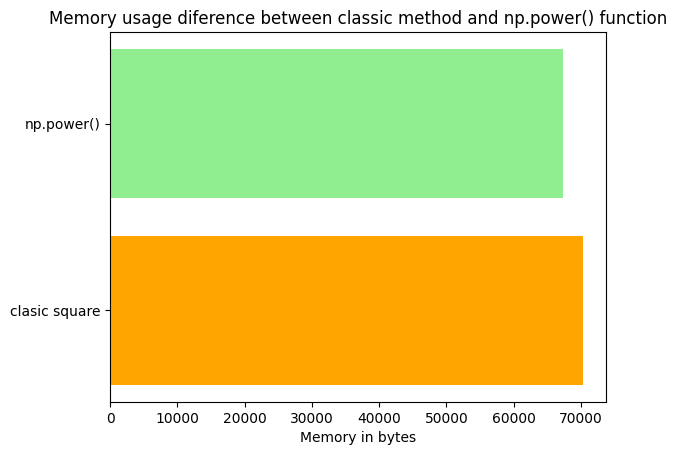

In [50]:
labels = ['clasic square', 'np.power()']
values = [clasic_sqare_peak, np_sqare_peak]
colors = ['orange', 'lightgreen']

plt.barh(labels, values, color=colors)

# seting the graph title
plt.title('Memory usage diference between classic method and np.power() function')
# seting the label for the x axis
plt.xlabel('Memory in bytes')

Conclusion